In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from pykalman import KalmanFilter

In [2]:
cpu_data = pd.read_csv('sysinfo.csv', parse_dates = [4])

In [3]:
loess_smoothed = lowess(cpu_data['temperature'], cpu_data['timestamp'],frac=0.1)


In [4]:
cpu_data.describe()

,cpu_freq,cpu_percent,sys_load_1,temperature
count,2160.000000,2160.000000,2160.000000,2160.000000
mean,1905.815772,0.025044,0.268167,34.978704
std,586.184690,0.052639,0.465756,4.700035
min,1603.827250,0.000000,0.000000,32.000000
25%,1605.131844,0.007500,0.050000,33.000000
50%,1632.132562,0.010000,0.100000,34.000000
75%,1822.559375,0.014800,0.210000,35.000000
max,3891.510250,0.534400,3.300000,58.000000


In [5]:
kalman_data = cpu_data[['temperature', 'cpu_percent', 'sys_load_1']]

In [6]:
observation_covariance = np.diag([cpu_data['temperature'].std(), 
                                  cpu_data['cpu_percent'].std(), 
                                  cpu_data['sys_load_1'].std()]) ** 2
initial_value_guess = kalman_data.iloc[0]
transition_matrix = [[1, -1, 0.7], [0, 0.6, 0.03], [0, 1.3, 0.8]]
transition_covariance = np.diag([2, 2, 2]) ** 2

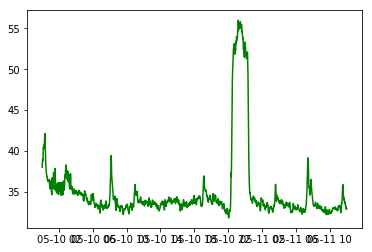

In [7]:
kf = KalmanFilter(
    initial_state_mean=initial_value_guess,
    initial_state_covariance=observation_covariance,
    observation_covariance=observation_covariance,
    transition_covariance=transition_covariance,
    transition_matrices=transition_matrix
)
kalman_smoothed, _ = kf.smooth(kalman_data)
plt.plot(cpu_data['timestamp'], kalman_smoothed[:, 0], 'g-')

In [16]:
cpu_data['cpu_percent12'] =  0.6 * cpu_data['cpu_percent'] + 0.03 * cpu_data['sys_load_1']

In [17]:
cpu_data['cpu_percent12'].std()

0.0439116728220689

In [20]:
cpu_data['cpu_percent12'].std()


0.0439116728220689